# 크롤링

<여는태그>내용</닫는태그>  
<여는태그 속성명="속성값">내용</닫는태그>  
<여는태그 속성명="속성값" />

html: 전체 html 문서를 감싸는 태그입니다. 하나만 존재해야 하고 html 바깥에 DOCTYPE을 제외한 다른 태그가 있으면 안 됩니다.  
head: html 문서에 대한 정보를 나타내는 부분입니다. 하나만 존재해야하고, html 바로 아래에 있어야합니다.  
body: html 문서에서 실제적으로 보여지는 부분을 나타냅니다. 하나만 존재해야 하고, html 바로 아래, head 다음에 위치해야 합니다.  
title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.  
meta: 문서에 대한 설명을 표시합니다. 사람에게는 보이지 않고, 브라우저만 읽을 수 있습니다. 속성으로 charset="utf-8"이라고 한 것은 브라우저에게 한글인코딩을 UTF-8로 설정하라고 알린 겁니다. 이 부분이 있어야 한글이 깨지지 않습니다.  
h1: body 안에서 제목을 표시하는 태그입니다. 중요도에 따라 h1부터 h2, h3, ..., h6까지 있습니다.  
div: 구역을 표시하는 태그입니다. 눈에 보이지는 않지만 p와 img 태그를 하나의 구역으로 묶었습니다.  
p: 문단을 표시하는 태그입니다. 여기 안에 글의 내용을 넣으면 됩니다.  
img: 이미지를 표시하는 태그입니다. 아까 src라는 속성이 있었는데 src는 이미지 파일의 경로(위치)를 지정하는 속성입니다.  
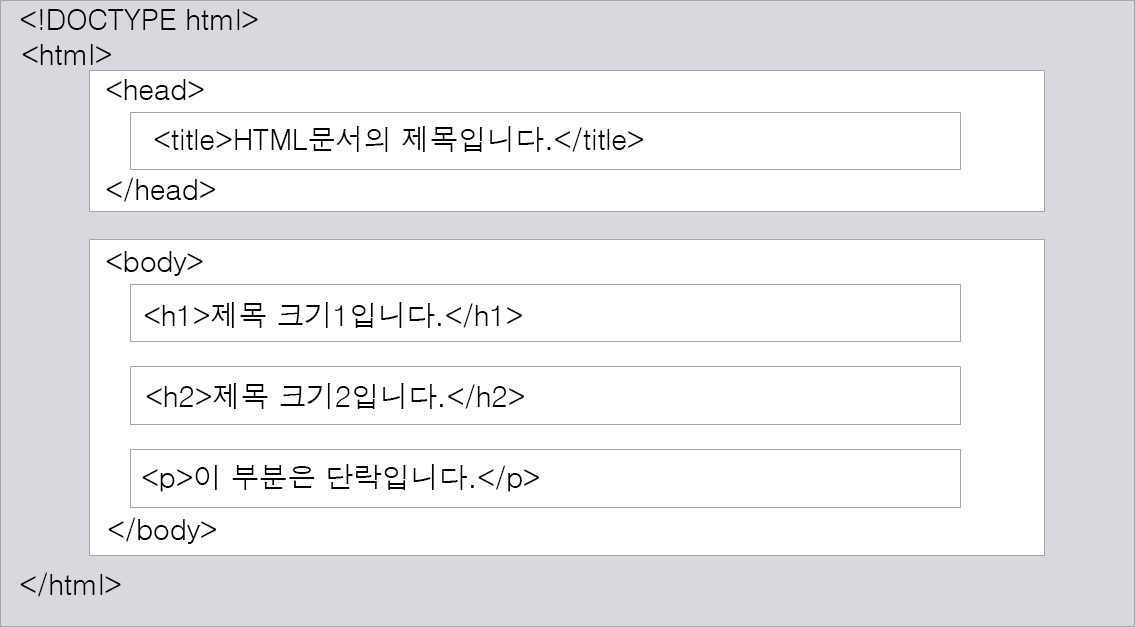

### From: 파일 안에 파일을 불러올때 씀

In [61]:
# _*_ coding: UTF-8 _*_
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

In [3]:
html = urlopen("http://www.naver.com")
html

## 웹문서 전체를 가져오기

In [62]:
bsObject = BeautifulSoup(html, "html.parser")
bsObject

### 첫 줄 빼고 가져오기

In [14]:
bsObject.html

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mob

## head 가져오기

In [15]:
bsObject.head

<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.

## title 가져오기

In [16]:
bsObject.head.title

<title>NAVER</title>

### 우리가 알고자 하는 텍스트만 가져오기

In [17]:
bsObject.head.title.get_text()  # bsObject.head.title.text.strip()

'NAVER'

## meta 데이터 가져오기
    큰 meta가 다른 meta들을 포함하고 있는 구조
    find_all('meta') :meta라는 모든 태그를 찾아라
    -meta덩어리를 가져오므로 중복이 있어서 원문보다 길다. 

In [18]:
bsObject.head.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="origin" name="Referrer"/>,
 <meta content="text/javascript" http-equiv="Content-Script-Type"/>,
 <meta content="text/css" http-equiv="Content-Style-Type"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=1100" name="viewport"/>,
 <meta content="NAVER" name="apple-mobile-web-app-title">
 <meta content="index,nofollow" name="robots">
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
 <meta content="네이버" property="og:title"/>
 <meta content="https://www.naver.com/" property="og:url"/>
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
 <meta content="summary" name="twitter:card"/>
 <meta content="" name="twitter:title"/>
 <meta content="https://www.naver.com/" name="twitter:url"/>
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobi

## meta 데이터의 모든 content 가져오기
    meta의 속성 가져오기
    .get('속성명')

In [19]:
for meta in bsObject.head.find_all('meta'):
    print(meta.get('content'))

None
Referrer
None
None
None
viewport
apple-mobile-web-app-title
robots
description
None
None
None
None
twitter:card
twitter:title
twitter:url
twitter:image
twitter:description


## meta 데이터 중 원하는 tag 가져오기
.find : find_all 보다 더 구체적

In [20]:
bsObject.head.find("meta", {"name":"description"})

<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description">
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://pm.pstatic.net/css/main_v190219.css" rel="stylesheet" type="text/css"/>
<link href="https://pm.pstatic.net/css/webfont_v170623.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/sstat

In [22]:
bsObject.head.find("meta", {"name":"description"}).get('content')

'네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'

In [23]:
bsObject.head.find("meta", {"content":"네이버"}).get('property')

'og:title'

## 모든 링크의 텍스트와 주소 가져오기
    .get: 속성값 가져옴

In [24]:
for link in bsObject.find_all('a'):
    print(link.get_text(), link.get('href'))

연합뉴스 바로가기 #news_cast
주제별캐스트 바로가기 #themecast
타임스퀘어 바로가기 #time_square
쇼핑캐스트 바로가기 #shp_cst
로그인 바로가기 #account
네이버 /
네이버를 시작페이지로 http://help.naver.com/support/alias/contents2/naverhome/naverhome_1.naver
쥬니어네이버 http://jr.naver.com
해피빈 http://happybean.naver.com/main/SectionMain.nhn
자동완성 펼치기 javascript:;
한글 입력기 javascript:;
도움말 보기 https://help.naver.com/support/contents/contents.nhn?serviceNo=606&categoryNo=16658
ON선택됨 #
OFF #
로그인 https://nid.naver.com/nidlogin.login
자세히 https://help.naver.com/support/alias/search/word/word_16.naver
자세히 https://help.naver.com/support/contents/contents.nhn?serviceNo=606&categoryNo=16659
도움말 https://help.naver.com/support/service/main.nhn?serviceNo=606&categoryNo=1987
신고 https://help.naver.com/support/contents/contents.nhn?serviceNo=605&categoryNo=18215
검색어저장 켜기 javascript:;
자동완성 끄기 javascript:;
도움말 https://help.naver.com/support/service/main.nhn?serviceNo=606&categoryNo=1987
신고 https://help.naver.com/support/contents/contents.nhn?serviceNo=605&categoryNo=18215

### 교보문고에서  신간 도서 정보를 가져오기
첫페이지에 있는 20권의 책목록에서 링크를 추출하여 각 추출된 링크로 접속하여 책이름, 저자, 가격 정보등을 출력

In [63]:
html = urlopen('http://www.kyobobook.co.kr/newproduct/newTopicKorList.laf?mallGb=KOR&ejkGb=KOR&orderClick=sba')
bsObject = BeautifulSoup(html, "html.parser")

In [64]:
bsObject


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<!-- s:html:head -->
<head>
<!--MS의 최신 웹브라우저인 edge 브라우저 호환을 위해 넣어줌-->
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>종합 | 새로나온 상품 | 국내도서 - 인터넷교보문고</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="nocache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="no-cache" http-equiv="Cache-Control"/>
<link href="http://image.kyobobook.co.kr/newimages/apps/b2c/kyobo.ICO" rel="shortcut icon"/>
<link href="http://image.kyobobook.co.kr/ink/css/default_ink.css" rel="stylesheet" type="text/css"/>
<!-- s:공통 스크립트 -->
<script src="http://image.kyobobook.co.kr/ink/js/jquery-1.4.4.min.js" type="text/javascript"></script>
<script type="text/javascript">jQuery.noConflict();</script>
<script src="/js/prototype.js" type="text/javascript

.select: 찾아라
next_sibling: 다음 tag
range(0,n): n번 돈다 (n+1번 아님 주의)


In [96]:
bsObject.find_all("dl",{"class":"book_title"})
dl=list(dl)

In [94]:
for n in range(0,20):
    title = dl[n].select('a')[0].get_text()
    author = dl[n].select('dd')[0].get_text().split()[0]
    publisher = dl[n].select('dd')[0].get_text().split()[-5]
    price = dl[n].select('strong')[1].get_text()
    print(n+1,title, author, publisher,price)

1 마디마디 팔딱이는 비트를(창비 청소년 시선) 김미희 창비교육 7,650원
2 카카오톡, 라인, 아이 메시지&페이스북 메신저와 함께하는 이모티콘으로 돈벌기 김영삼 한빛미디어 16,200원
3 제로 다이어트 이시무라 비타북스 12,150원
4 국민건강보험공단 봉투모의고사 4회(2019)(에듀윌) 에듀윌 에듀윌 10,800원
5 너의 삶도 조금은 특별해질 수 있어 태오 더시드컴퍼니 14,400원
6 버선발 이야기(양장본 HardCover) 백기완 오마이북 13,500원
7 365일 생각하는 빵(My Favorite Things) 스기쿠보 나무수 15,120원
8 성게, 메뚜기, 불가사리가 그렇게 생긴 이유 모토카와 김영사 14,220원
9 여탕에서 생긴 일(비채×마스다 미리 컬렉션 1) 마스다 비채 10,350원
10 숨겨진 보물 사라진 도시 질케 현암사 16,200원
11 우리에겐 쉼표가 필요하다 마이클 현암사 14,400원
12 미술교육학(4판) 이규선 03월 22,000원
13 세월 아니 1984BOOKS 12,420원
14 하체 밸런스 스트레칭 다카하시 포레스트북스 13,950원
15 만렙을 찍을 때까지 박일환 창비교육 7,650원
16 Do it! 안드로이드 앱 프로그래밍(6판) 정재곤 이지스퍼블리싱 36,000원
17 무역영어 1급 이론+기출문제(2019)(해커스) 해커스 해커스금융 25,920원
18 리얼 트립 제주 송세진 북탐 14,400원
19 나의 소년. 5 Hitomi 에이케이커뮤니케이션즈 4,950원
20 튀김의 비밀(일본의 튀김명가 덴푸라 곤도 주인이 알려주는) 곤도 그린쿡 13,500원


In [97]:
# Create a file to write to, add headers row
with open('crawling_homework.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['order', 'title', 'author', 'publisher'])

    for n in range(0,20):
        title = dl[n].select('a')[0].get_text()
        author = dl[n].select('dd')[0].get_text().split()[0]
        publisher = dl[n].select('dd')[0].get_text().split()[-5]
        price = dl[n].select('strong')[1].get_text()
        writer.writerow([n+1, title, author, publisher,price])
        
    